In [ ]:
import importlib

def install_if_not_installed(package):
    try:
        importlib.import_module(package)
        print(f"{package} is already installed.")
    except ImportError:
        print(f"{package} is not installed. Installing...")
        !pip install {package}
        print(f"{package} has been successfully installed.")

# Check and install ucimlrepo if not installed
install_if_not_installed("mglearn")

# Import and use ucimlrepo
import mglearn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'Target')

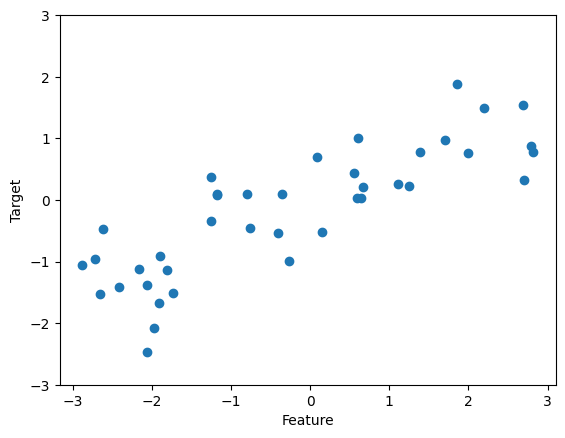

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

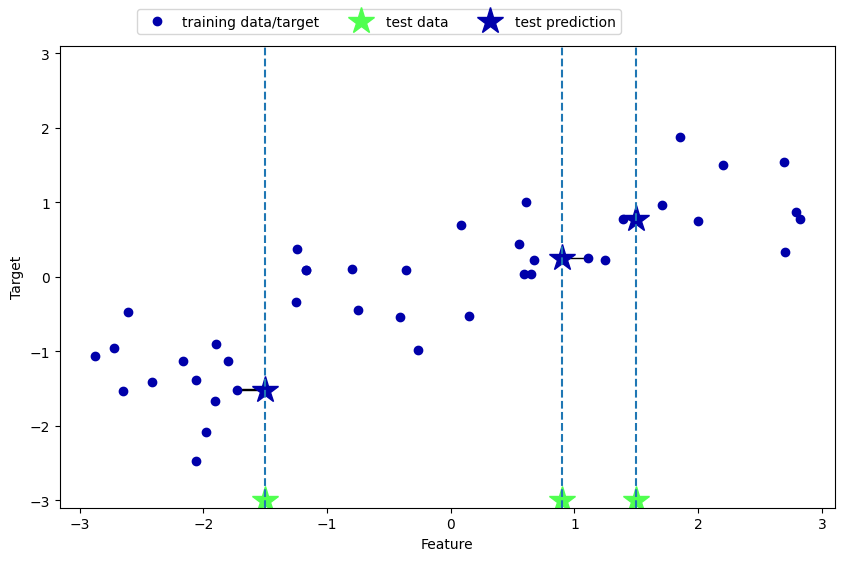

In [4]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
knn_reg = KNeighborsRegressor(n_neighbors=3)

# fit the model using the training data and training targets
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [13]:
predictions = knn_reg.predict(X_test)

# Round the predictions to three decimal places
rounded_predictions = np.round(predictions, 3)

# Print the rounded predictions as a list
print("Test set predictions:")
print(list(rounded_predictions))

Test set predictions:
[-0.054, 0.357, 1.137, -1.894, -1.139, -1.631, 0.357, 0.912, -0.447, -1.139]


In [16]:
print(f"Test set R^2: {knn_reg.score(X_test, y_test):.3f}")


Test set R^2: 0.834


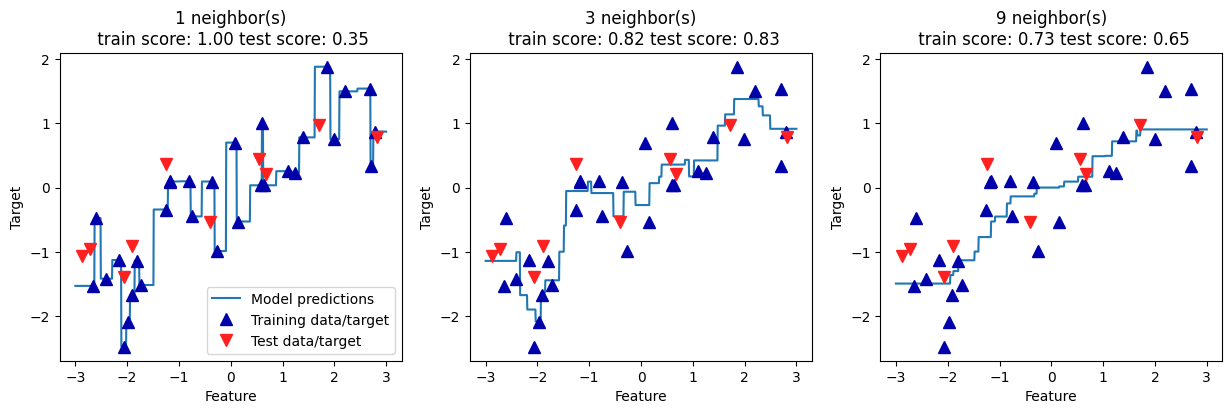

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    knn_reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_reg.fit(X_train, y_train)
    ax.plot(line, knn_reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
    "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
    n_neighbors, knn_reg.score(X_train, y_train),
    knn_reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
 "Test data/target"], loc="best")
